# **DOCUMENTATION**

>`1)Propose two questions (non-predictive) that you believe are interesting to
explore and can be answered using the provided dataset (at least one question should
be answered using hypothesis test). Briefly describe why you think those questions are
interesting to whom. You can answer this question in a markdown cell of your ipynb file`

ِ`ANS:`

**Q1)What are the 10 most fields listed  occupations in jobs?**

<a> OR

**Q1)What are the 10 jobs with highest salary in top rated companies?**

**Q2)Is a data analysis job gets  highest salary?**

> <a> **Briefly describe why you think those questions are interesting to whom**

* I am interested in this Questions because ,I want to know the most fields that required in Labor market

* also I want to know the jobs or fields that have highest salary in top rated companies  

* I suggested that data analysis is a higher salary compared to
other jobs 

* and Iam intersted to know if data analysis job has highest salary or not...

* I asked this Questions because To Conducting a quick statistics of data that interest to most people 



---

>`4)Briefly describe your feature engineering plan (at least two columns should be
involved). No coding needed`


><a>**feature engineering plan**

* In practice, data rarely comes in the form of ready-to-use matrices. That's why every task begins with feature extraction. Sometimes, it can be enough to read the csv file and convert it into numpy.array, but this is a rare exception.

* Filling in the missing values ,for example I fill most of categorical features
by simple imputer (most frequant)

* we can perform feature reduction using the feature importances from the model or other techniques such as PCA.

* groupby: group a dataframe by a column ,I used it for company name and mean of (max_salary)
* I detected some outliers ,and we should handel it 

* Aggregating Numeric Columns such as rating and founded

* we can do one-hot encode a dataframe with only the categorical columns (get_dummies)
* drop unnecessary features 
* handle text by vectorization
* feature selection 
*Missing Data Imputation 
* we also can use pipline and cross validation 





---

### **Drive**

In [11]:
#conect to drive to get data 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Libraries**

In [12]:
!pip install skimpy

In [13]:
#import Required libraries
import numpy as np
import pandas as pd
import re #Library for regular expresions
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from wordcloud import WordCloud
import pandas_profiling as pp
import warnings
import os
# Plot Map in plotly
import plotly.graph_objects as go

warnings.filterwarnings('ignore')
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import plotly 
import plotly.express as px

import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
# !pip install skimpy
from skimpy import clean_columns

# **EDA** 

In [14]:
# Loading the data into the pandas data frame is certainly one of the most important steps in EDA
#read data file 
data=pd.read_csv('/content/drive/MyDrive/data1.csv')
# To display the top 5 rows 
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,Cloud Engineer,$76K-$128K (Glassdoor est.),The Expertise You Have Proven expertise in dev...,4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1
16156,Electrical Engineer,$76K-$128K (Glassdoor est.),Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,-1
16157,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,-1,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
16158,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1


> Data Type for all columns 

In [15]:
# Checking the types of data
data.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [16]:
#check for numerical and categorical data 
numerical= data.select_dtypes('number').columns

categorical = data.select_dtypes('object').columns

print('---------------------')
print(f'Numerical Columns:  {data[numerical].columns}')
print('---------------------')
print(f'Categorical Columns: {data[categorical].columns}')
print('---------------------')

---------------------
Numerical Columns:  Index(['Rating', 'Founded'], dtype='object')
---------------------
Categorical Columns: Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Easy Apply'],
      dtype='object')
---------------------


> As we see we have numerical and categorical features 

In [17]:
data.describe()

,Rating,Founded
count,16160.000000,16160.000000
mean,3.295056,1456.283911
std,1.550252,871.461505
min,-1.000000,-1.000000
25%,3.200000,-1.000000
50%,3.700000,1980.000000
75%,4.100000,2002.000000
max,5.000000,2020.000000


In [18]:
data_agg = data.groupby('Rating', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
data_agg.head()

Rating Founded                                 
           count         mean   max   min     sum
0   -1.0    1596   140.057644  2020    -1  223532
1    1.0      52   113.634615  2015    -1    5909
2    1.4       2    -1.000000    -1    -1      -2
3    1.5       3  2011.666667  2017  2007    6035
4    1.6      30   132.600000  2003    -1    3978

In [19]:
#describe data
data.describe(include='object').T

,count,unique,top,freq
Job Title,16160,7208,Data Analyst,1384
Salary Estimate,16160,574,$48K-$87K (Glassdoor est.),95
Job Description,16160,13280,"Job description\nInterpret data, analyze resul...",47
Company Name,16158,6239,"Staffigo Technical Services, LLC\n5.0",440
Location,16160,763,"New York, NY",1133
Headquarters,16160,1181,"New York, NY",1105
Size,16160,9,10000+ employees,3424
Type of ownership,16160,15,Company - Private,8706
Industry,16160,117,IT Services,2315
Sector,16160,26,Information Technology,4521


> `As we see ,Data Analyst Is the Most freq  in jobs ,the most freq location is NY
,The most freq sector is Information Technology and so on`




In [20]:
data.columns = data.columns.str.replace(' ', '_') #adjustment of columns for performing sql queries
data

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,Cloud Engineer,$76K-$128K (Glassdoor est.),The Expertise You Have Proven expertise in dev...,4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1
16156,Electrical Engineer,$76K-$128K (Glassdoor est.),Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,-1
16157,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,-1,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
16158,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1


In [21]:
data.isnull().sum()

Job_Title            0
Salary_Estimate      0
Job_Description      0
Rating               0
Company_Name         2
Location             0
Headquarters         0
Size                 0
Founded              0
Type_of_ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy_Apply           0
dtype: int64

In [22]:
# Counting missing values showing -1 
(data== '-1').sum()

Job_Title                0
Salary_Estimate         46
Job_Description          0
Rating                   0
Company_Name             0
Location                 0
Headquarters           968
Size                   924
Founded                  0
Type_of_ownership      924
Industry              2291
Sector                2288
Revenue                924
Competitors          11824
Easy_Apply           15553
dtype: int64

> The dataset has -1 as value in most features and this no meaning and no relation in data for ex:
salary estimate has 46 (-1) and there is no value in salary (-1) ,so I will replace all (-1) by nan values to deal with it 

In [23]:
data.duplicated().value_counts()

False    16137
True        23
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16160 entries, 0 to 16159
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job_Title          16160 non-null  object 
 1   Salary_Estimate    16160 non-null  object 
 2   Job_Description    16160 non-null  object 
 3   Rating             16160 non-null  float64
 4   Company_Name       16158 non-null  object 
 5   Location           16160 non-null  object 
 6   Headquarters       16160 non-null  object 
 7   Size               16160 non-null  object 
 8   Founded            16160 non-null  int64  
 9   Type_of_ownership  16160 non-null  object 
 10  Industry           16160 non-null  object 
 11  Sector             16160 non-null  object 
 12  Revenue            16160 non-null  object 
 13  Competitors        16160 non-null  object 
 14  Easy_Apply         16160 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.8+ MB


In [25]:
data.describe(include='all')

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply
count,16160,16160,16160,16160.000000,16158,16160,16160,16160,16160.000000,16160,16160,16160,16160,16160,16160
unique,7208,574,13280,NaN,6239,763,1181,9,NaN,15,117,26,14,1070,2
top,Data Analyst,$48K-$87K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",NaN,"Staffigo Technical Services, LLC\n5.0","New York, NY","New York, NY",10000+ employees,NaN,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1,-1
freq,1384,95,47,NaN,440,1133,1105,3424,NaN,8706,2315,4521,4277,11824,15553
mean,NaN,NaN,NaN,3.295056,NaN,NaN,NaN,NaN,1456.283911,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.550252,NaN,NaN,NaN,NaN,871.461505,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.200000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data.shape

(16160, 15)

In [27]:
data.count()      # Used to count the number of rows

Job_Title            16160
Salary_Estimate      16160
Job_Description      16160
Rating               16160
Company_Name         16158
Location             16160
Headquarters         16160
Size                 16160
Founded              16160
Type_of_ownership    16160
Industry             16160
Sector               16160
Revenue              16160
Competitors          16160
Easy_Apply           16160
dtype: int64

> Replace all (-1) by null value

In [28]:
data.replace("-1", np.nan, inplace=True)
data.replace(-1, np.nan, inplace=True)
data.replace(-1.0, np.nan, inplace=True)

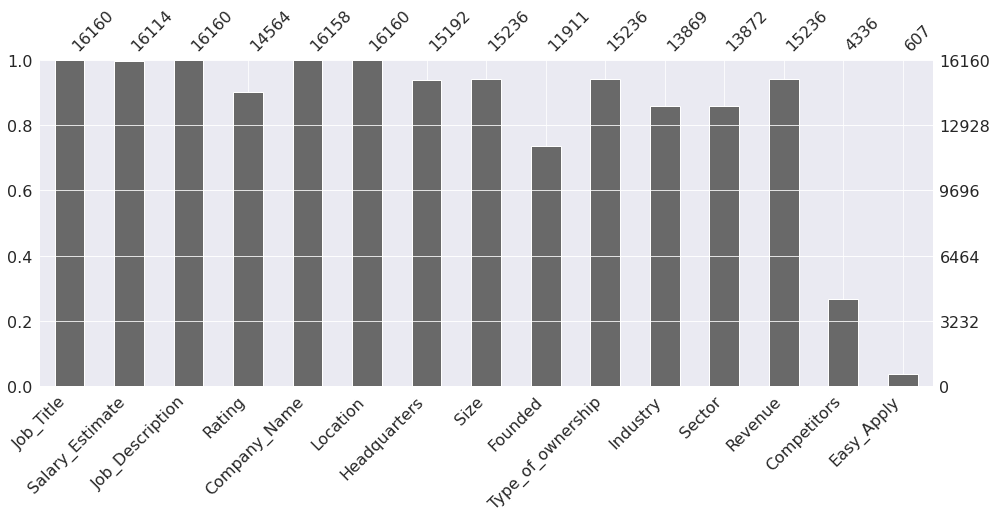

In [29]:
import missingno as msno
msno.bar(data, figsize=(16,6))
plt.show()

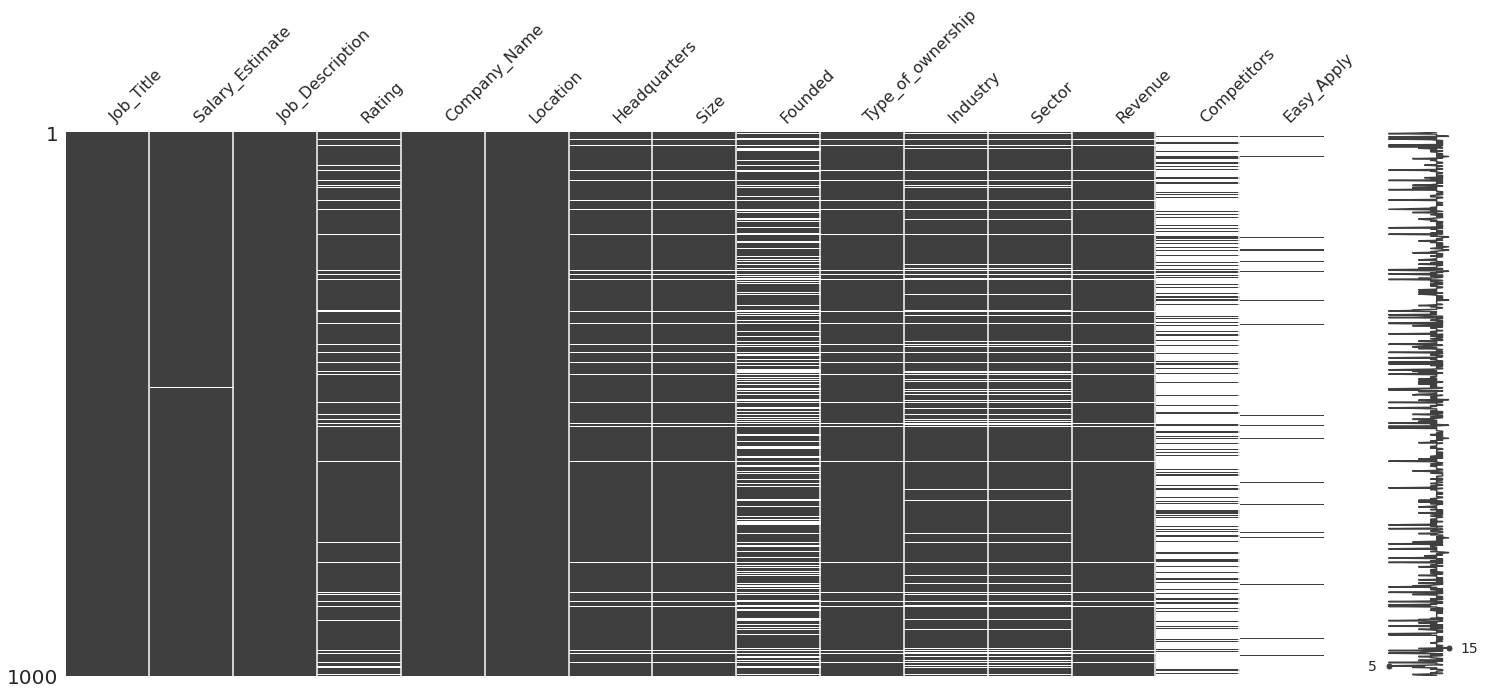

In [30]:
#Matrix plot 
 
import missingno as msnum 
msnum.matrix(data.sample(1000))

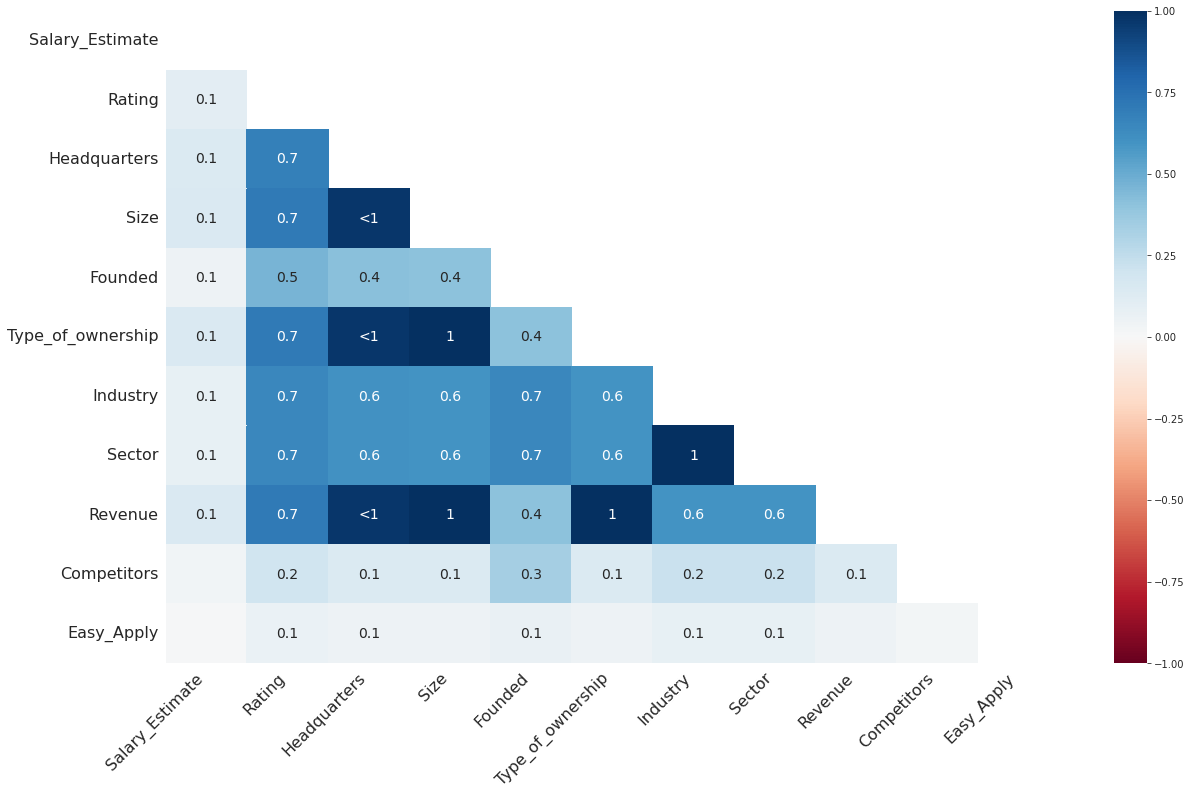

In [31]:
#Heatmaps
 
import missingno as msnum 
msnum.heatmap(data.sample(1000))

In [32]:
num_data, cat_data = list(data.select_dtypes(include=np.number)), list(data.select_dtypes(exclude=np.number))
num_data

['Rating', 'Founded']

**Outliers in all numerical data**

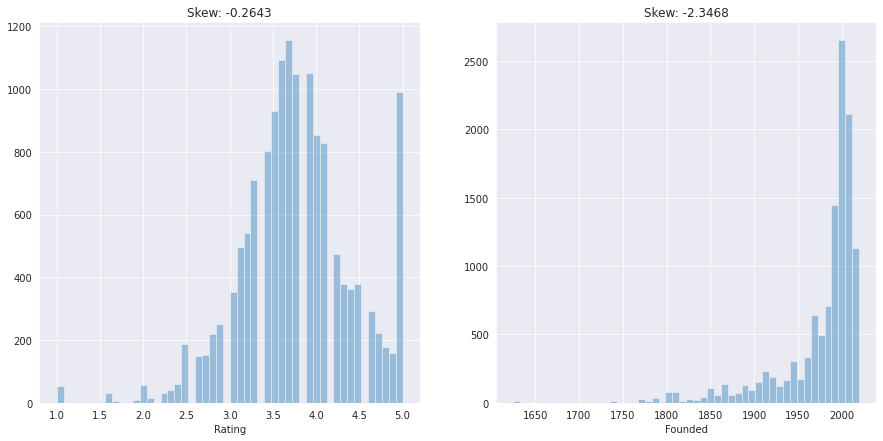

In [33]:
#check outlier for numerical data
f, a = plt.subplots(1,2, figsize=(15,7))
a = a.flatten().T
for i, col in enumerate(data[num_data].columns):
    sns.distplot(data[col],ax=a[i],kde=False).set_title('Skew: {:.4f}'.format(data[col].skew()))
plt.show()

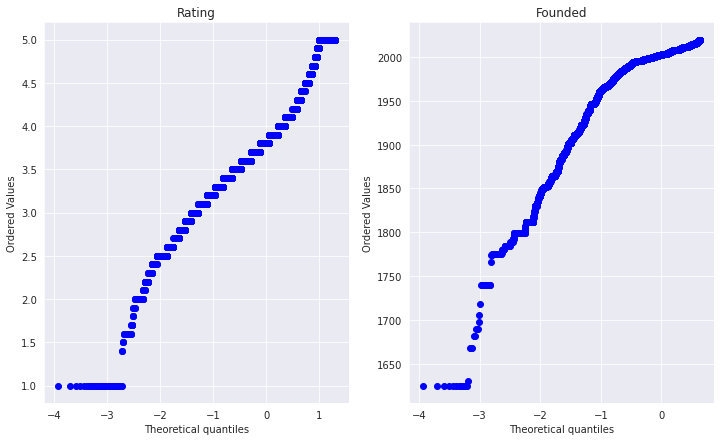

In [34]:
import scipy
from scipy import stats
f, a = plt.subplots(1,2, figsize=(12,7))
a = a.flatten().T
for i, col in enumerate(data[num_data].columns):
    stats.probplot(data[col], plot=a[i])
    a[i].set_title(col)
plt.show()

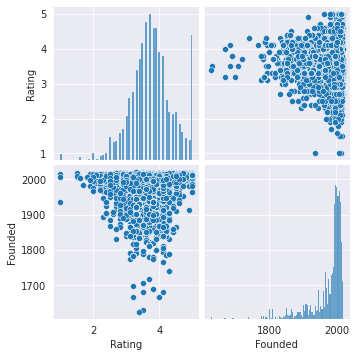

In [35]:
sns.pairplot(data[num_data]); plt.show()



---

>`2)Analyze the quality of data (all columns) and report statistics of missing data
and outliers. Briefly describe your step and findings.`

Ans:

* I answered this Question by code below 


## **Analysis for each columns**

<a>Analyze the quality of data (all columns) and report statistics of missing data
and outliers

In [36]:
#define function to check if has null value and count of them ,check duplicate ,values count and so on 
def check_col(col):
    print('column name : ', col)
    print('--------------------------------')
    print('Per_of_Nulls   : ', '%', round(data[col].isnull().sum() / data.shape[0]*100, 2))
    print('Num_of_Nulls   : ', data[col].isnull().sum())
    print('Num_of_Uniques : ', data[col].nunique())
    print('Duplicates     : ', data.duplicated(subset = None, keep = 'first').sum())
    print(data[col].value_counts(dropna = False).sort_index())

### **Job Title**

In [37]:
data['Job_Title']

0                    Senior Data Scientist
1        Data Scientist, Product Analytics
2                     Data Science Manager
3                             Data Analyst
4                   Director, Data Science
                       ...                
16155                       Cloud Engineer
16156                  Electrical Engineer
16157                Sr. Big Data Engineer
16158       Senior Big Data / ETL Engineer
16159                       Cloud Engineer
Name: Job_Title, Length: 16160, dtype: object

In [38]:
check_col('Job_Title')

column name :  Job_Title
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  7208
Duplicates     :  23
!!!100% Remote!!! Sr. Data and Integration Engineer                                1
"Business Analyst/ Data Analyst with experience on any one of Financial Product    1
#104252 Division Data and Financial Analyst                                        1
#104293 Business Tech Support Analyst                                              1
#104733 HPC Systems and Data Engineer                                              2
                                                                                  ..
senior data analyst                                                                1
senior data systems analyst                                                        2
systems Analyst 1596 (d)                                                           1
{"title":"GAO Analyst (Data Analysis)","extended":{"opening_type":null}}           3
【1yr

> As we see job title has no null value and 23 duplicates,the data in this columns not clean so I will do some Preprocessing in it and Plot outliers 

In [39]:
# replace the matching strings ,replace Sr,jr by senior and junior 
data = data.replace(to_replace ='Sr', value = 'Senior', regex = True)
data = data.replace(to_replace ='Jr', value = 'Junior', regex = True)

In [40]:
data['Job_Title'] = data['Job_Title'].str.replace('\d+', '')#remove all numbers from columns

In [41]:
data['Job_Title'] = data['Job_Title'].replace('\*','',regex=True)# Remove (*) 

In [42]:
# removing '.' 
data['Job_Title'] = data['Job_Title'].str.replace(".", "") #Remove (.)

In [43]:
#Separate values for create new two fields from them:
data['Job_Title'],_= data['Job_Title'].str.split(',',1).str

In [44]:
for i, value in enumerate(data.Job_Title.unique()): 
    print(i+1,". value is ",value)

Streaming output truncated to the last 5000 lines.
1442 . value is  Data Scientist (Marketing Analytics)
1443 . value is  Data Scientist - Strategic Data Solutions
1444 . value is  Remote Sensing Data Scientist
1445 . value is  Business Intelligence Analyst II ( Month Contract)
1446 . value is  Senior Data & Applied Scientist
1447 . value is  Recruiting Manager
1448 . value is  Healthcare Data Analyst - Remote
1449 . value is  Architect
1450 . value is  Applied Machine Learning Scientist
1451 . value is  Data Scientist (ML and Image Processing)
1452 . value is  Lead Data Scientist – Secret Clearance Required
1453 . value is  AppleCare Business Insight Data Scientist
1454 . value is  Remote Senior Data Scientist (Healthcare / Claims Data)
1455 . value is  Cybersecurity Data Scientist
1456 . value is  Research Engineering/ Scientist Assistant
1457 . value is  Principal Data Scientist-Developer Experience (SDK
1458 . value is  EDI Data Analyst
1459 . value is  Artificial Intelligence Rese

In [45]:
data['Job_Title'].value_counts(dropna=False).head(10)#list first 10 most listed occupations

Data Analyst                1498
Data Engineer                758
Business Analyst             565
Senior Data Analyst          383
Data Scientist               343
Senior Data Engineer         199
Business Systems Analyst     149
Senior Data Scientist        140
Senior Business Analyst      125
Junior Data Analyst          119
Name: Job_Title, dtype: int64

In [46]:
# Parsing Job Seniority from Job Titles
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'Senior'
    elif 'jr' in title.lower() or 'jr' in title.lower() or 'junior' in title.lower() or 'entry' in title.lower():
        return 'Junior'
    elif 'intern' in title.lower() or 'internship' in title.lower() or 'temp' in title.lower():
        return 'Intern'
    else:
        return 'General'

data['job_seniority'] = data['Job_Title'].apply(seniority)
data['job_seniority'].value_counts()

General    12364
Senior      3153
Junior       538
Intern       105
Name: job_seniority, dtype: int64

### <a>**Q1)What are the 10 most fields listed  occupations in jobs?**

findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.


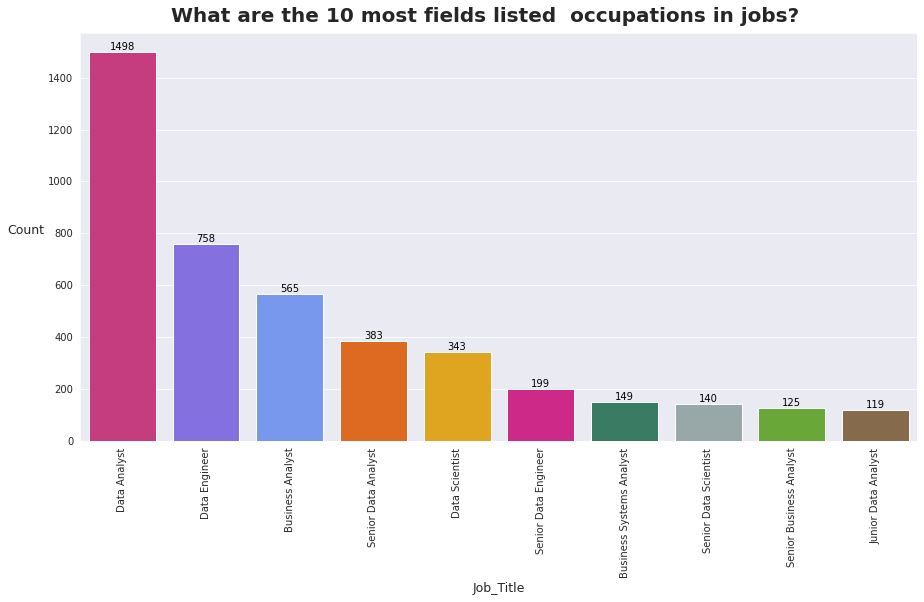

In [47]:
plt.figure(figsize=(15,7.5)) #figsize must be applied before plotting the graph

#always make sure to use color blind palette accesible for all viewers! 
color_blind_palette = ["#DC267F", "#785EF0", "#648FFF", "#FE6100", "#FFB000", "#E80E8D", "#2E8766", "#95ABAC", "#65B925", "#906A42",
                       "#C4D537", "#344A52", "#6C6E06", "#1C4DD2", "#216E00", "#2E03E5", "#A94424", "#7F6EA9", "#9B8453", "#380721"]

most_listed_occupations = sns.barplot(x=data['Job_Title'].value_counts().head(10).index,
                                      y=data['Job_Title'].value_counts().head(10).values, palette=color_blind_palette)

plt.xticks(rotation='vertical') #text rotation on x axis for readability
plt.xlabel('Job_Title', fontsize=12.5)
plt.ylabel('Count', rotation=0, ha='right', fontsize=12.5)
plt.figtext(.5,.9,"What are the 10 most fields listed  occupations in jobs?", fontsize=20, fontweight='bold', fontname='helvetica', ha='center') #formatted title

for patch in most_listed_occupations.patches:
             most_listed_occupations.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

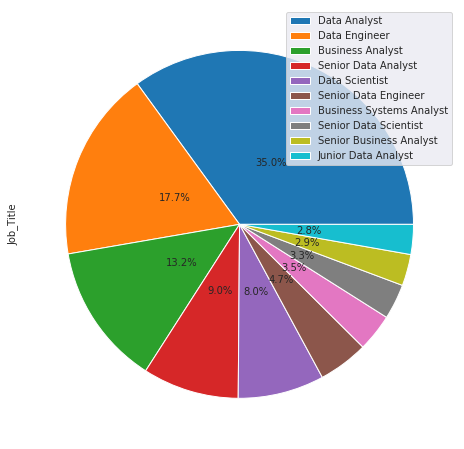

In [48]:
#visualization jop title
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
data['Job_Title'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%', labeldistance = None, pctdistance = 0.4, textprops={'fontsize': 10})
plt.legend( loc='best')

In [49]:
# from sklearn import preprocessing
# LE = preprocessing.LabelEncoder()
# LE_col = ['Job_Title']
# for i in LE_col:
#   data.loc[:, i] = LE.fit_transform(data[i])
# data.info()

In [50]:
# sns.boxplot(x=data['Job_Title'])

### **Salary Estimate**

In [51]:
data['Salary_Estimate']

0        $111K-$181K (Glassdoor est.)
1        $111K-$181K (Glassdoor est.)
2        $111K-$181K (Glassdoor est.)
3        $111K-$181K (Glassdoor est.)
4        $111K-$181K (Glassdoor est.)
                     ...             
16155     $76K-$128K (Glassdoor est.)
16156     $76K-$128K (Glassdoor est.)
16157     $76K-$128K (Glassdoor est.)
16158     $76K-$128K (Glassdoor est.)
16159     $76K-$128K (Glassdoor est.)
Name: Salary_Estimate, Length: 16160, dtype: object

In [52]:
check_col('Salary_Estimate')

column name :  Salary_Estimate
--------------------------------
Per_of_Nulls   :  % 0.28
Num_of_Nulls   :  46
Num_of_Uniques :  573
Duplicates     :  23
$10-$26 Per Hour(Glassdoor est.)     3
$100K-$108K (Glassdoor est.)        14
$100K-$128K (Glassdoor est.)        31
$100K-$152K (Glassdoor est.)        30
$100K-$160K (Glassdoor est.)        30
                                    ..
$99K-$173K (Glassdoor est.)          6
$99K-$174K (Glassdoor est.)         30
$99K-$177K (Glassdoor est.)         32
$99K-$178K (Glassdoor est.)         32
NaN                                 46
Name: Salary_Estimate, Length: 574, dtype: int64


> As we see in this feature ,it has 46 null value ,and has some outliers and noise so I will do some preprocessing to deal with it 

In [53]:
data['Salary_Estimate'],_= data['Salary_Estimate'].str.split('(',1).str # seprate number and text then use number only 

In [54]:
data['Min_Salary'],data['Max_Salary']= data['Salary_Estimate'].str.split('-').str # seprate salary to max and min 

In [55]:
data['Min_Salary'],data['Max_Salary']

(0        $111K
 1        $111K
 2        $111K
 3        $111K
 4        $111K
          ...  
 16155     $76K
 16156     $76K
 16157     $76K
 16158     $76K
 16159     $76K
 Name: Min_Salary, Length: 16160, dtype: object, 0        $181K 
 1        $181K 
 2        $181K 
 3        $181K 
 4        $181K 
           ...  
 16155    $128K 
 16156    $128K 
 16157    $128K 
 16158    $128K 
 16159    $128K 
 Name: Max_Salary, Length: 16160, dtype: object)

In [56]:
data['Max_Salary'].replace({"$53 Per Hour": "$53K", "$26 Per Hour": "$26K"}, inplace=True)
data['Max_Salary'].replace({"$27 Per Hour": "$27K"}, inplace=True)
data['Max_Salary'].replace({"$75Per Hour": "$75K"}, inplace=True)

In [57]:
# Created values Max Salary and Min Salary as well as data cleaning with strip methods from string class
# Replace withe spaces for nan values through the numpy.
clean_salary = lambda x: x.replace('', np.nan).str.strip().str.lstrip('$').str.rstrip('K').astype(float)

In [58]:
data['Min_Salary'] = clean_salary(data['Min_Salary'])
data['Max_Salary'] = clean_salary(data['Max_Salary'])

In [59]:
data['avg_salary'] = (data.Min_Salary + data.Max_Salary) / 2

In [60]:
# Empty Field 'Salary Estimate' but created Max and Min salary.
data = data.drop(['Salary_Estimate'],axis = 1)

# Show 'df1' with the changes realized previously. 
data.head()

,Job_Title,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply,job_seniority,Min_Salary,Max_Salary,avg_salary
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,NaN,NaN,Senior,111.0,181.0,146.0
1,Data Scientist,"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,NaN,NaN,General,111.0,181.0,146.0
2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,NaN,Unknown / Non-Applicable,NaN,TRUE,General,111.0,181.0,146.0
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",NaN,General,111.0,181.0,146.0
4,Director,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",NaN,General,111.0,181.0,146.0


In [61]:
np.dtype(data['Max_Salary'])

dtype('float64')

In [62]:
data['Max_Salary'].isnull().sum()

46

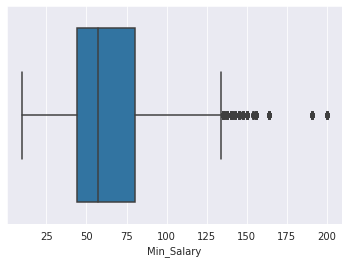

In [63]:
sns.boxplot(x=data['Min_Salary'])

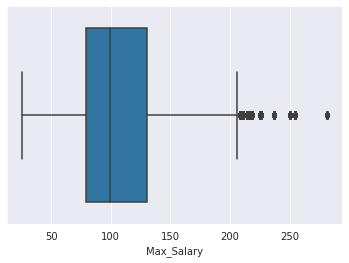

In [64]:
sns.boxplot(x=data['Max_Salary'])

In [65]:
data[data['Max_Salary'].isnull()]

,Job_Title,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply,job_seniority,Min_Salary,Max_Salary,avg_salary
10150,Configuration/Data Management Analyst III,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001.0,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),NaN,NaN,General,NaN,NaN,NaN
12680,SAP Data Analyst,"Title SAP Data Analyst Location Wichita, KS Le...",5.0,Global Soft Systems\n5.0,"Wichita, KS","Overland Park, KS",1 to 50 employees,NaN,Company - Private,Consulting,Business Services,$1 to $5 million (USD),NaN,NaN,General,NaN,NaN,NaN
12681,Data Scientist/Data Analyst,"WHO WE ARE: Net Pay Advance, Inc. is a financi...",5.0,Net Pay Advance Inc\n5.0,"Wichita, KS","Wichita, KS",1 to 50 employees,2007.0,Company - Private,Lending,Finance,$5 to $10 million (USD),NaN,NaN,General,NaN,NaN,NaN
12682,Master Data Management Analyst,Challengers Wanted.\nSee how we're embracing t...,NaN,"Koch Companies Services, LLC","Wichita, KS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,General,NaN,NaN,NaN
12767,Junior Data Analyst,Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","Lexington-Fayette, KY","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,Junior,NaN,NaN,NaN
12768,Climate Data Analyst,Job Description\nClimate Data Analyst\n\nLexin...,3.8,On Time Talent Solutions\n3.8,"Lexington-Fayette, KY","Golden Valley, MN",1 to 50 employees,2015.0,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN,General,NaN,NaN,NaN
12769,Data Analyst,Job Description\nJob description\n\n• Interpre...,5.0,"Staffigo Technical Services, LLC\n5.0","Lexington-Fayette, KY","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,General,NaN,NaN,NaN
12770,Data Conversion Analyst,"About us\n\nBitwerx, Inc. is a team of industr...",NaN,"Bitwerx, Inc.","Lexington-Fayette, KY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,General,NaN,NaN,NaN
12771,Data Analyst Junior,Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","Lexington-Fayette, KY","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,Junior,NaN,NaN,NaN
13408,P&C Data Analytics Analyst - PR,P&C Data Analytics Analyst opening in Pennsylv...,NaN,Pryor Associates,United States,"Hicksville, NY",1 to 50 employees,NaN,Company - Private,NaN,NaN,Unknown / Non-Applicable,NaN,NaN,General,NaN,NaN,NaN


> As we see ,all null value in estimate salary related with job title that has analysis in title ,I think this is MAR mechanism

In [66]:
mean_min= round(data[data["Job_Title"].str.contains('Analy', na=False)]['Min_Salary'].mean())
mean_max = round(data[data["Job_Title"].str.contains('Analy', na=False)]['Max_Salary'].mean())

print('Mean minimum salary of job title analytics {}'.format(mean_min))
print('Mean maximum salary of job title analytics {}'.format(mean_max))

Mean minimum salary of job title analytics 57
Mean maximum salary of job title analytics 97


In [67]:
data['Min_Salary'] = data['Min_Salary'].fillna(mean_min)

In [68]:
data['Max_Salary'] = data['Max_Salary'].fillna(mean_max)

In [69]:
data['avg_salary'].isnull().sum()

46

In [70]:
avg_mean= (mean_min + mean_max) / 2

In [71]:
avg_mean

77.0

In [72]:
data['avg_salary']=data['avg_salary'].fillna(avg_mean)

In [73]:
data['avg_salary'].isnull().sum()

0

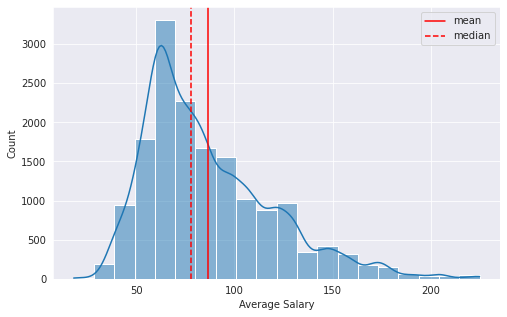

In [74]:
## Salary Distribution (Histogram)

plt.figure(figsize = (8,5))
ax = sns.histplot(x='avg_salary', data = data, bins = 20, kde = True)
ax.axvline(data['avg_salary'].mean(), color='r', linestyle='-', label = 'mean')
ax.axvline(data['avg_salary'].median(), color = 'r', linestyle='--', label = 'median')
plt.xlabel('Average Salary')
ax.legend()

plt.show()

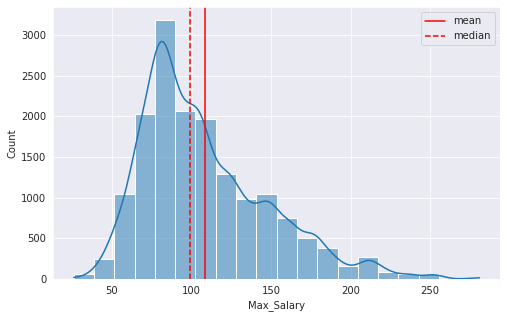

In [75]:
## Salary Distribution (Histogram)

plt.figure(figsize = (8,5))
ax = sns.histplot(x='Max_Salary', data = data, bins = 20, kde = True)
ax.axvline(data['Max_Salary'].mean(), color='r', linestyle='-', label = 'mean')
ax.axvline(data['Max_Salary'].median(), color = 'r', linestyle='--', label = 'median')
plt.xlabel('Max_Salary')
ax.legend()

plt.show()



---

### **Job Description**

In [76]:
check_col('Job_Description')

column name :  Job_Description
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  13280
Duplicates     :  23
"ASRC Federal DOJ AFPS a subsidiary of ASRC Federal Holding Company, is seeking a Data Analyst/Driver Messenger in anticipation of a favorable award of the upcomingRole/Responsibilities:\n\nData Analyst/Driver Messenger\nSome offices require a Data Analyst to occasionally perform driver and messenger\nactivities specifically related to the Asset Forfeiture Program. These activities consist of Data\nAnalyst tasks and the following:\nOperation of Government vehicles, Contractor vehicles in performance of\ncontract requirements, and seized conveyances in the custody of the Government\nDelivery of messages, documents, packages and mail to business concerns or\nGovernment offices\nDelivery of seized assets (including high value and confidential) in accordance\nwith approved Government requirements\nMaintain a log of items received and deliv

In [77]:
data['Job_Description'][0]

'ABOUT HOPPER\n\nAt Hopper, we’re on a mission to make booking travel faster, easier, and more transparent. We are leveraging the power that comes from combining massive amounts of data and machine learning to build the world’s fastest-growing travel app -- one that enables our customers to save money and travel more. With over $235M CAD in funding from leading investors in both Canada and the US, Hopper is primed to continue its path toward becoming the go-to way to book travel as the world continues its shift to mobile.\n\nRecognized as the fastest-growing travel app by Forbes and one of the world’s most innovative companies by Fast Company two years in a row, Hopper has been downloaded over 40 million times and has helped travelers plan over 100 million trips and counting. The app has received high praise in the form of mobile accolades such as the Webby Award for Best Travel App of 2019, the Google Play Award for Standout Startup of 2016 and Apple’s App Store Best of 2015.\n\nTake 

This columns not have missing value I will detect outliers for all categorical in the last after convert them to numerical 

> <a>**What are the skills that most companies are looking for from applicants?**

In [78]:
# A dictionary is created with a list of hard skills to search in the job description fields
import re #Library for regular expresions 

hard_skills_dict = {
    'Python': r"python",
    'R': r"[\b\s/]r[\s,\.]",
    'Excel': r"excel",
    'SQL': r"sql",
    'NoSQL': r"\bNo[\s,-]sql[\s]",
    'PowerBI': r"power[\s]BI",
    'Tableau': r"tableau",
    'SPSS': r'\bSPSS\b',
    'Big Data': r"\sbig\sdata\s",
    'SAP BI': r"SAP[\s]BI",
    'MongoDB': r"MongoDB",
    'Hadoop': r"Hadoop",
    'SAS': r"\bSAS\b",
    'VBA': r"\bvba\b",
    'AWS': r"\baws\b",
    'Git': r"\bGit",
    'QlikView': r"\bQlikView",
    'Oracle BI': r"oracle[\n]BI",
    'Scala': r"Scala",
    'Dashboard': r"\bDashboard[s]",
    'Spark': r"Spark",
    'Matlab': r"Matplotlib",
    'Linux': r"linux",
    'Unix': r"unix",
    'Looker': r"looker",
    'C# or C++': r"\bC[#\+\+]",
    'Java': r"java",
    'PowerPivot': r"Power[\s]Pivot",
    'PowerQuery': r"Power[\s]Query",
    'BigQuery': r"Big[\s]Query",
    'Apache Cassandra': r"[\b\s]Cassandra[\b\s]",
    'Neo4j': r"Neo4j",
    'TensorFlow': r"TensorFlow"
}

hard_skills_count = {}

# Loop through skills for count the frecuency in Jobs Description Field.
for key, search in hard_skills_dict.items():
    hard_skills_count[key] = data['Job_Description'].str.contains(search, flags = re.IGNORECASE).sum()

df_skills = pd.DataFrame.from_dict(hard_skills_count, orient = 'index') \
                        .sort_values(0, ascending = False) \
                        .reset_index() \
                        .rename(columns = {'index': 'Skills', 0: 'Count'})

df_skills['Relative Frecuency'] = (df_skills['Count'] / sum(df_skills['Count'])) *100
df_skills['Relative Frecuency'] = df_skills['Relative Frecuency'].apply(lambda x: round(x, 2))

# Remove values less than '1' per cent in its Relative Frequency
df_skills = df_skills.drop(df_skills[df_skills['Relative Frecuency'] < 1.00].index, axis = 0)

df_skills.head(df_skills.shape[0])

,Skills,Count,Relative Frecuency
0,Excel,8474,17.01
1,SQL,8054,16.17
2,Python,5181,10.40
3,Tableau,2863,5.75
4,Scala,2736,5.49
5,Java,2637,5.29
6,R,2328,4.67
7,Dashboard,2025,4.07
8,Spark,1978,3.97
9,AWS,1821,3.66


In [79]:
# Plot visualization the tops hards skills.
chart_skills = px.bar(df_skills, x = 'Skills', y = 'Count',
                     color = 'Relative Frecuency',
                     labels = {'Skills': 'Hard Skills','Count': 'Nº of Requests'})
chart_skills.show()



---


### **Rating**

In [80]:
check_col('Rating')

column name :  Rating
--------------------------------
Per_of_Nulls   :  % 9.88
Num_of_Nulls   :  1596
Num_of_Uniques :  38
Duplicates     :  23
1.0      52
1.4       2
1.5       3
1.6      30
1.7       7
1.8       3
1.9       9
2.0      56
2.1      15
2.2      32
2.3      41
2.4      61
2.5     186
2.6     148
2.7     152
2.8     218
2.9     250
3.0     352
3.1     496
3.2     542
3.3     711
3.4     804
3.5     930
3.6    1093
3.7    1155
3.8    1048
3.9    1050
4.0     854
4.1     828
4.2     474
4.3     380
4.4     364
4.5     379
4.6     291
4.7     221
4.8     178
4.9     158
5.0     991
NaN    1596
Name: Rating, dtype: int64


> Rating has 9% missing value ,so I will deal with it by fill forward and backword according to job title 

In [81]:
def fill_prop(df2, group_col, col_name):
    '''Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    for group in list(df2[group_col].unique()):
        cond = df2[group_col]==group
        grp_inx = list(df2[cond][col_name].index)
        df2.loc[cond, col_name] = df2.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df2[col_name] = df2[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df2[col_name].isnull().sum())
    print("------------------")
    print(df2[col_name].value_counts(dropna=False).sort_index())

In [82]:
fill_prop(data, 'Job_Title', 'Rating')

Number of NaN :  0
------------------
1.0      56
1.4       3
1.5       3
1.6      34
1.7       7
1.8       3
1.9      10
2.0      63
2.1      17
2.2      38
2.3      45
2.4      69
2.5     206
2.6     174
2.7     167
2.8     242
2.9     295
3.0     392
3.1     532
3.2     602
3.3     812
3.4     887
3.5    1016
3.6    1200
3.7    1271
3.8    1147
3.9    1164
4.0     965
4.1     911
4.2     524
4.3     433
4.4     396
4.5     421
4.6     325
4.7     253
4.8     198
4.9     176
5.0    1103
Name: Rating, dtype: int64


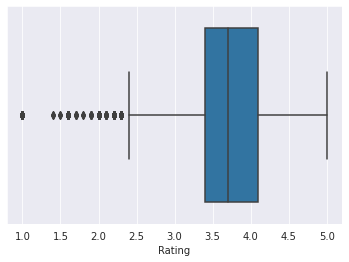

In [83]:
sns.boxplot(x=data['Rating'])

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


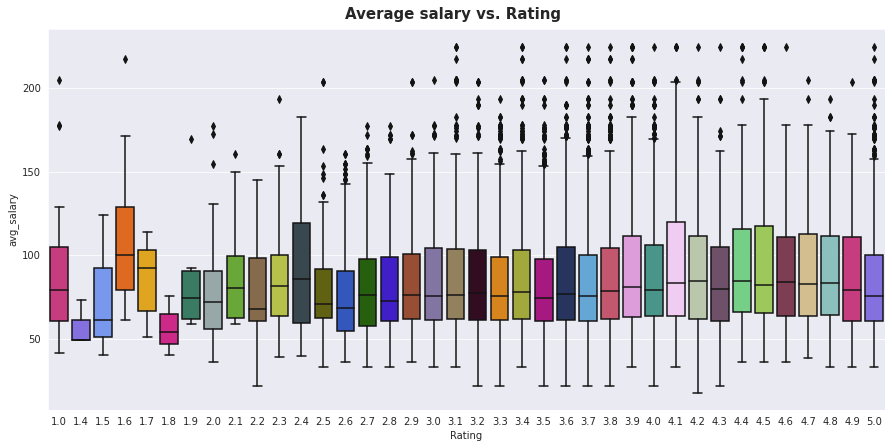

In [84]:
color_blind_palette = ["#DC267F", "#785EF0", "#648FFF", "#FE6100", "#FFB000", "#E80E8D", "#2E8766", "#95ABAC", "#65B925", "#906A42", "#C4D537", "#344A52", "#6C6E06", "#1C4DD2", "#216E00", "#2E03E5", "#A94424", "#7F6EA9", "#9B8453", "#380721", "#F38700", "#B4BA2A", "#BD028B", "#1E2F66", "#51AAE8", "#D44564", "#E792E4", "#3CA291", "#F5C5FA", "#BBCBA8", "#734C6C", "#67DE7C", "#9FDA4A", "#883350", "#DEC284", "#82C9C6"]

plt.figure(figsize=(15,7))
plt.figtext(.5, .9, "Average salary vs. Rating", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center') #formatted title

sns.boxplot(data=data, x="Rating",y="avg_salary", palette=color_blind_palette) #přidat boxplots s max a min salary

> As we see the highest rating have range between 50 and 100 avarege salary 

>`3)For the two questions you proposed in the first subquestion, what are the null
hypothesis and alternative hypothesis? Perform statistical test to answer your question
and report your findings.`


Ans:

* I answered this Question by code below 


### <a> **Q2) What are the 10 jobs with highest salary in top rated companies?**


In [85]:
!pip install pandasql

In [86]:
import pandasql as ps
from pandasql import sqldf
df_task_highest_salary_top_comp = """SELECT Job_Title,MAX(Max_Salary), MAX(Rating) 
             FROM data 
             GROUP BY Job_Title
             ORDER BY Max_Salary DESC, Rating DESC
             LIMIT 10"""
ps.sqldf(df_task_highest_salary_top_comp) 

,Job_Title,MAX(Max_Salary),MAX(Rating)
0,Data Engineer- Wilmington,281.0,5.0
1,Big Data - Software Engineer,281.0,3.9
2,Data Engineer - Manager,281.0,3.9
3,IT Advisor,281.0,3.8
4,Python Software Engineer,281.0,3.7
5,Senior SSIS Data Integration Engineer,281.0,3.4
6,Data Engineer / IOT Company,281.0,1.6
7,Deployed Data Scientist,254.0,5.0
8,Product Data Analyst,254.0,5.0
9,Senior Data Scientist,254.0,5.0


> As we see Data engineer has max salary according to high rating In dataset

### **<a>Hypothies test**

**One sample t-test**

* Null Hypothesis : the mean of max salary is 156.18595297029702

* Alternate Hypothesis: the mean of max salary is another value and alpha = 5% or 0.05

In [87]:
import scipy.stats as stats

> One sample t-test
I have range of salary and I predect that mean of it is 156.18595297029702

In [88]:
np.array(data['Max_Salary'])

array([181., 181., 181., ..., 128., 128., 128.])

In [89]:
from scipy.stats import ttest_1samp
import numpy as np
Max_salary = np.array(data['Max_Salary'])
print(Max_salary)
salary_mean = np.mean(Max_salary)
print(salary_mean)
tset, pval = ttest_1samp(Max_salary ,156.18595297029702)

print('p-values',pval)

if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

[181. 181. 181. ... 128. 128. 128.]
108.18595297029702
p-values 0.0
 we are rejecting null hypothesis


><a>As we see my null hypothesis was rejected ,and the alternative hypothesis is 108.18595297029702 



---


### **Company Name**

In [90]:
data['Company_Name']

0                                      Hopper\n3.5
1                                     Noom US\n4.5
2                                         Decode_M
3                            Sapphire Digital\n3.4
4                  United Entertainment Group\n3.4
                           ...                    
16155                              PMG Global\n4.5
16156              Albin Engineering Services\n2.9
16157    Cincinnati Bell Technology Solutions\n3.7
16158                                  Schwab\n3.5
16159          SPECTRAFORCE TECHNOLOGIES Inc.\n3.6
Name: Company_Name, Length: 16160, dtype: object

In [91]:
check_col('Company_Name')

column name :  Company_Name
--------------------------------
Per_of_Nulls   :  % 0.01
Num_of_Nulls   :  2
Num_of_Uniques :  6239
Duplicates     :  22
1                                     2
1-800-Flowers\n2.8                    1
1-800-Flowers.com\n2.8                1
101 Commerce                          1
10th Magnitude\n4.6                   2
                                     ..
xentity corporation\n5.0              2
zacxo                                 2
zb.io                                 1
zz-Tarzana Treatment Centers, Inc.    1
NaN                                   2
Name: Company_Name, Length: 6240, dtype: int64


In [92]:
data['Company_Name'].value_counts()

Staffigo Technical Services, LLC\n5.0               440
Diverse Lynx\n3.9                                   105
Kforce\n4.1                                         100
Apple\n4.1                                           98
Amazon\n3.9                                          96
                                                   ... 
WCI Consulting\n4.0                                   1
Business Control Systems, LP (Internal Position)      1
Kalkomey Enterprises, LLC\n4.4                        1
Academic Partnerships\n4.1                            1
Albin Engineering Services\n2.9                       1
Name: Company_Name, Length: 6239, dtype: int64

In [93]:
data['Company_Name'],_= data['Company_Name'].str.split('\n',1).str

In [94]:
data['Company_Name'],_= data['Company_Name'].str.split(',',1).str

In [95]:
# removing '.' 
data['Company_Name'] = data['Company_Name'].str.replace(".", "") 

In [96]:
data['Company_Name'].isnull().sum()

2

In [97]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = 'most_frequent')

In [98]:
data['Company_Name'] = my_imputer.fit_transform(data['Company_Name'].to_numpy().reshape(-1,1))

In [99]:
data['Company_Name'].isnull().sum()

0

> <a>In company name ,I filled missing data by simple imputer (most frequent)

### **Easy Apply**

In [100]:
check_col('Easy_Apply')

column name :  Easy_Apply
--------------------------------
Per_of_Nulls   :  % 96.24
Num_of_Nulls   :  15553
Num_of_Uniques :  1
Duplicates     :  22
TRUE      607
NaN     15553
Name: Easy_Apply, dtype: int64


<a>In this feature I considered that nan value is 0 
and true 1

In [101]:
data['Easy_Apply']=data['Easy_Apply'].fillna(0)

In [102]:
data['Easy_Apply'].replace({"TRUE": 1}, inplace=True)

In [103]:
data['Easy_Apply']

0        0
1        0
2        1
3        0
4        0
        ..
16155    0
16156    0
16157    0
16158    0
16159    0
Name: Easy_Apply, Length: 16160, dtype: int64

In [104]:
data['Easy_Apply']=data['Easy_Apply'].astype('int')

In [105]:
data['Easy_Apply'].value_counts()

0    15553
1      607
Name: Easy_Apply, dtype: int64

### **Competitors**

In [106]:
check_col('Competitors')

column name :  Competitors
--------------------------------
Per_of_Nulls   :  % 73.17
Num_of_Nulls   :  11824
Num_of_Uniques :  1069
Duplicates     :  22
3M, Avery Dennison                                  1
3M, Tyco                                            2
AAA Texas, State Farm, Progressive Insurance        1
ADP, Paychex, Ceridian                              1
ADP, Paychex, Milliman                              1
                                                ...  
mge, Xcel Energy, MidAmerican Energy                1
naviHealth, Optum, Magellan Health                  1
projekt202, IDEO                                    2
Össur, Freedom Innovations, DJO                     1
NaN                                             11824
Name: Competitors, Length: 1070, dtype: int64


In [107]:
data['Competitors'].value_counts()

Google, Microsoft, Samsung Electronics                   98
Google, Microsoft, Walmart                               96
Amazon, Accenture, Microsoft                             93
Adecco, Manpower                                         70
Robert Half, Insight Global                              57
                                                         ..
First Data, Elavon, Bank of America Merchant Services     1
Elsevier, Thomson Reuters, Google                         1
Capita, G4S, Mitie                                        1
Allstate, Nationwide, State Farm                          1
STS Aviation, Strom Aviation, Aerotek                     1
Name: Competitors, Length: 1069, dtype: int64

In [108]:
data['Competitors'].isnull().sum()

11824

In [109]:
data['Competitors']

0                             NaN
1                             NaN
2                             NaN
3            Zocdoc, Healthgrades
4        BBDO, Grey Group, Droga5
                   ...           
16155                         NaN
16156                         NaN
16157                         NaN
16158                         NaN
16159                         NaN
Name: Competitors, Length: 16160, dtype: object

In [110]:
# Drop 'Competitors' because it has alot of missing data
data=data.drop(labels='Competitors', axis=1)

<a>I dropped Competitors  because it has alot of missing data

**Companies That Have Jobs as Data Analyst With Max Salary**

In [111]:
# Extracted data the Easy Apply with values equal '1', in the other words,  
# this part will to make only in offers jobs where is easy applicated
df_easy_apply = data[data['Easy_Apply'] == 1]
df_easy_apply.reset_index()
df_easy_apply.head(10)

,Job_Title,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Easy_Apply,job_seniority,Min_Salary,Max_Salary,avg_salary
2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,3.7,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,NaN,Unknown / Non-Applicable,1,General,111.0,181.0,146.0
7,Quantitative Research Associate,Seeking a quant to work with senior researcher...,3.9,Enlightenment Research,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,NaN,Unknown / Non-Applicable,1,General,111.0,181.0,146.0
8,AI Scientist,Paige is a software company helping pathologis...,5.0,Paige,"New York, NY","New York, NY",1 to 50 employees,2018.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,1,General,111.0,181.0,146.0
10,Data Scientist,Company Description:\n\nQuartet is a pioneerin...,3.9,Quartet Health,"New York, NY","New York, NY",201 to 500 employees,2014.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,1,General,111.0,181.0,146.0
15,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,3.0,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,1,General,111.0,181.0,146.0
31,Data Scientist,"At Lyft, our mission is to improve people's li...",3.7,Lyft,"New York, NY","San Francisco, CA",5001 to 10000 employees,2012.0,Company - Public,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,1,General,120.0,140.0,130.0
34,Data Science Analyst,Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies,"New York, NY","New York, NY",201 to 500 employees,1914.0,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),1,General,120.0,140.0,130.0
42,Technical Data Consultant,WHO WE ARE\n\nBraze delivers customer experien...,4.3,Braze,"New York, NY","New York, NY",501 to 1000 employees,2011.0,Company - Private,Advertising & Marketing,Business Services,$100 to $500 million (USD),1,General,120.0,140.0,130.0
49,Data Scientist,"Hello, World! Codecademy has helped tens of mi...",3.5,Codecademy,"New York, NY","New York, NY",51 to 200 employees,2011.0,Company - Private,Education Training Services,Education,Unknown / Non-Applicable,1,General,120.0,140.0,130.0
66,People Analytics Data Scientist,What you’ll do day-to-day\n\n\nThe data scient...,4.4,D E Shaw & Co,"New York, NY","New York, NY",1001 to 5000 employees,1988.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,1,General,119.0,147.0,133.0


In [112]:
# New Dataframe through method 'Groupby' from 'pandas' packet
df_easy_apply_2 = df_easy_apply.groupby(['Company_Name'])['Max_Salary'].mean().reset_index()
# Apply concate fields and order descendent for dataframe before and perform cut in ten primary
df_easy = pd.DataFrame()
df_easy = pd.concat([df_easy_apply_2['Company_Name'], 
                     df_easy_apply_2['Max_Salary']], axis = 1)
df_easy = df_easy.sort_values('Max_Salary', ascending = False).head(20).reset_index().drop('index', axis = 1)
df_easy.head(20)

,Company_Name,Max_Salary
0,SpotIM,254.00
1,Earnin,250.00
2,Sedaa,226.00
3,Bandai Namco Entertainment America,220.00
4,Whova,217.00
5,Truvian Sciences,217.00
6,The Trade Desk,214.50
7,Via Transportation,210.00
8,UtopiaCompression Corporation,208.00
9,Samsung NEXT,203.00


In [113]:
import pandasql as ps
from pandasql import sqldf
df_task_highest_salary_top_comp = """SELECT Company_Name,MAX(Max_Salary), MAX(Rating) 
             FROM data 
             GROUP BY Company_Name
             ORDER BY Max_Salary DESC, Rating DESC
             LIMIT 10"""
ps.sqldf(df_task_highest_salary_top_comp) 

,Company_Name,MAX(Max_Salary),MAX(Rating)
0,JLA,281.0,3.7
1,ConcertAI,254.0,5.0
2,Galileo,254.0,5.0
3,Landis,254.0,5.0
4,Thrasio,254.0,5.0
5,The Buttonwood Tree,254.0,4.7
6,SpotIM,254.0,4.5
7,Simple Health,254.0,4.4
8,Tapad,254.0,4.2
9,NewtonX,254.0,4.1


In [114]:
df_task_highest_salary_top_comp = """SELECT Company_Name,MAX(Rating) 
             FROM data 
             GROUP BY Company_Name
             ORDER BY Rating DESC, Rating DESC
             LIMIT 10"""
ps.sqldf(df_task_highest_salary_top_comp) 

,Company_Name,MAX(Rating)
0,1872 Consulting,5.0
1,AAA of Western & Central NY,5.0
2,ACT I - Advanced Concepts & Technologies Int LLC,5.0
3,ALLStem,5.0
4,ARC Group,5.0
5,AXIS Management Group,5.0
6,AccumTech,5.0
7,Ackerman Cancer Center,5.0
8,Acuity Cloud Solutions,5.0
9,Aeva Specialty Pharmacy,5.0


In [115]:
# Plot graph bar with Plotly included color graduation in function the Max Salary Mean.
import plotly.express as px
chart = px.bar(df_easy, y = 'Max_Salary', x = 'Company_Name', color = 'Max_Salary',
              color_continuous_scale = px.colors.sequential.Viridis,
              title = "Companies That Have Jobs as Data Analyst With Max Salary")
chart.show()

### **Location**

In [116]:
check_col('Location')

column name :  Location
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  763
Duplicates     :  22
Aberdeen Proving Ground, MD     3
Addison, TX                    21
Alachua, FL                     1
Alameda, CA                     1
Albuquerque, NM                 9
                               ..
Woodlawn, MD                    2
Woodridge, IL                   3
Wright Patterson AFB, OH        1
Yorktown, VA                    1
Yuma Proving Ground, AZ         1
Name: Location, Length: 763, dtype: int64


In [117]:
data['Location']

0          New York, NY
1          New York, NY
2          New York, NY
3         Lyndhurst, NJ
4          New York, NY
              ...      
16155      Westlake, TX
16156    Fort Worth, TX
16157        Irving, TX
16158      Westlake, TX
16159      Westlake, TX
Name: Location, Length: 16160, dtype: object

In [118]:
# Seperate Acronym and City from Location Field
data['City'], data['Acronym State'] = data['Location'].str.split(',', 1).str

In [119]:
data['City']

0          New York
1          New York
2          New York
3         Lyndhurst
4          New York
            ...    
16155      Westlake
16156    Fort Worth
16157        Irving
16158      Westlake
16159      Westlake
Name: City, Length: 16160, dtype: object

In [120]:
data['Acronym State']

0         NY
1         NY
2         NY
3         NJ
4         NY
        ... 
16155     TX
16156     TX
16157     TX
16158     TX
16159     TX
Name: Acronym State, Length: 16160, dtype: object

In [121]:
df_task_city = """SELECT City, COUNT(*) AS Job_count
                    FROM data
                    GROUP BY City
                    ORDER BY Job_count DESC
                    LIMIT 20"""
ps.sqldf(df_task_city)

,City,Job_count
0,New York,1133
1,Austin,989
2,Chicago,945
3,San Diego,929
4,Houston,850
5,San Antonio,755
6,Jacksonville,616
7,Philadelphia,595
8,Los Angeles,577
9,Dallas,545


In [122]:
data

,Job_Title,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Easy_Apply,job_seniority,Min_Salary,Max_Salary,avg_salary,City,Acronym State
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,0,Senior,111.0,181.0,146.0,New York,NY
1,Data Scientist,"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,0,General,111.0,181.0,146.0,New York,NY
2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,3.7,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,NaN,Unknown / Non-Applicable,1,General,111.0,181.0,146.0,New York,NY
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,0,General,111.0,181.0,146.0,Lyndhurst,NJ
4,Director,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,General,111.0,181.0,146.0,New York,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,Cloud Engineer,The Expertise You Have Proven expertise in dev...,4.5,PMG Global,"Westlake, TX","Herndon, VA",1 to 50 employees,NaN,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),0,General,76.0,128.0,102.0,Westlake,TX
16156,Electrical Engineer,Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993.0,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0,General,76.0,128.0,102.0,Fort Worth,TX
16157,Senior Big Data Engineer,Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions,"Irving, TX","Cincinnati, OH",501 to 1000 employees,NaN,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),0,Senior,76.0,128.0,102.0,Irving,TX
16158,Senior Big Data / ETL Engineer,"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab,"Westlake, TX","Dettenheim, Germany",Unknown,NaN,Company - Public,NaN,NaN,Unknown / Non-Applicable,0,Senior,76.0,128.0,102.0,Westlake,TX


In [123]:
# Drop 'Competitors' because it has alot of missing data
data=data.drop(labels=['Location','Acronym State'], axis=1)

### **Sector**

In [124]:
check_col('Sector')

column name :  Sector
--------------------------------
Per_of_Nulls   :  % 14.16
Num_of_Nulls   :  2288
Num_of_Uniques :  25
Duplicates     :  22
Accounting & Legal                     265
Aerospace & Defense                    329
Agriculture & Forestry                  15
Arts, Entertainment & Recreation        32
Biotech & Pharmaceuticals              485
Business Services                     3318
Construction, Repair & Maintenance      77
Consumer Services                       84
Education                              326
Finance                               1214
Government                             327
Health Care                            793
Information Technology                4521
Insurance                              511
Manufacturing                          424
Media                                  242
Mining & Metals                          3
Non-Profit                             114
Oil, Gas, Energy & Utilities           171
Real Estate                          

In [125]:
data['Sector'] = my_imputer.fit_transform(data['Sector'].to_numpy().reshape(-1,1))

In [126]:
check_col('Sector')

column name :  Sector
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  25
Duplicates     :  22
Accounting & Legal                     265
Aerospace & Defense                    329
Agriculture & Forestry                  15
Arts, Entertainment & Recreation        32
Biotech & Pharmaceuticals              485
Business Services                     3318
Construction, Repair & Maintenance      77
Consumer Services                       84
Education                              326
Finance                               1214
Government                             327
Health Care                            793
Information Technology                6809
Insurance                              511
Manufacturing                          424
Media                                  242
Mining & Metals                          3
Non-Profit                             114
Oil, Gas, Energy & Utilities           171
Real Estate                             63

**2)What are the 10 jobs with highest salary in top rated companies?**




In [127]:
df_task_highest_salary_top_comp = """SELECT  Sector, MAX(Max_Salary), MAX(Rating) 
             FROM data 
             GROUP BY Sector
             ORDER BY Max_Salary DESC, Rating DESC
             LIMIT 10"""
ps.sqldf(df_task_highest_salary_top_comp) 

,Sector,MAX(Max_Salary),MAX(Rating)
0,Health Care,254.0,5.0
1,Retail,254.0,5.0
2,"Arts, Entertainment & Recreation",250.0,5.0
3,Consumer Services,225.0,5.0
4,Information Technology,281.0,5.0
5,Biotech & Pharmaceuticals,281.0,5.0
6,Manufacturing,237.0,5.0
7,Telecommunications,210.0,4.9
8,Media,218.0,5.0
9,Education,237.0,5.0


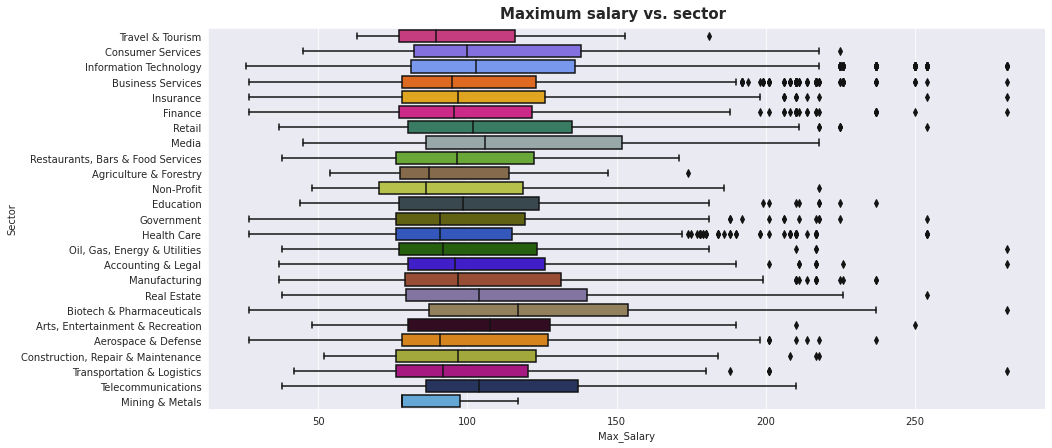

In [128]:
olor_blind_palette = ["#DC267F", "#785EF0", "#648FFF", "#FE6100", "#FFB000", "#E80E8D", "#2E8766", "#95ABAC", "#65B925", "#906A42", "#C4D537", "#344A52", "#6C6E06", "#1C4DD2", "#216E00", "#2E03E5", "#A94424", "#7F6EA9", "#9B8453", "#380721", "#F38700", "#B4BA2A", "#BD028B", "#1E2F66", "#51AAE8", "#D44564", "#E792E4", "#3CA291", "#F5C5FA", "#BBCBA8", "#734C6C", "#67DE7C", "#9FDA4A", "#883350", "#DEC284", "#82C9C6"]

plt.figure(figsize=(15,7))
plt.figtext(.5, .9, "Maximum salary vs. sector", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center') #formatted title
sns.boxplot(data=data, x="Max_Salary",y="Sector", palette=color_blind_palette)

In [129]:
df_task_hungry_sectors = """SELECT Sector, COUNT(*) AS count
                    FROM data
                    GROUP BY Sector
                    ORDER BY count DESC
                    LIMIT 20"""
ps.sqldf(df_task_hungry_sectors)

,Sector,count
0,Information Technology,6809
1,Business Services,3318
2,Finance,1214
3,Health Care,793
4,Insurance,511
5,Biotech & Pharmaceuticals,485
6,Manufacturing,424
7,Aerospace & Defense,329
8,Government,327
9,Education,326


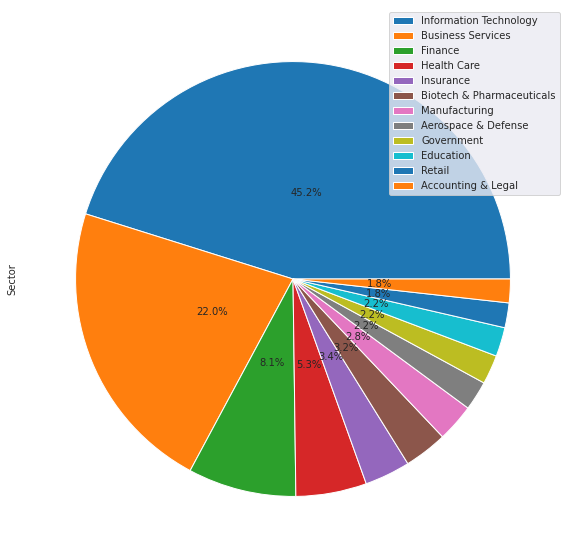

In [130]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
data['Sector'].value_counts()[:12].plot(kind='pie',autopct='%1.1f%%', labeldistance = None, pctdistance = 0.4, textprops={'fontsize': 10})
plt.legend( loc='best')

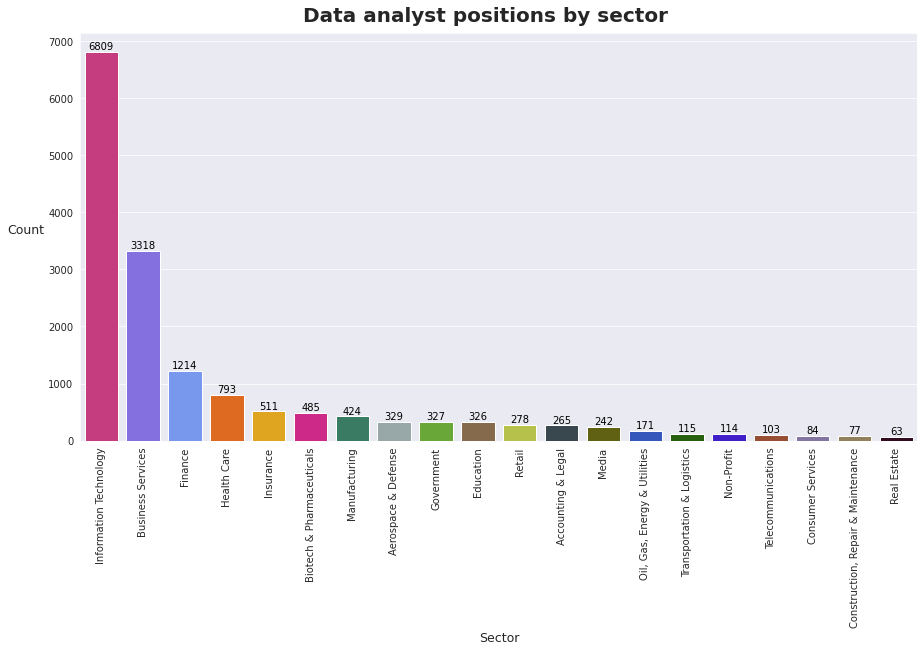

In [131]:
plt.figure(figsize=(15,7.5)) #figsize must be applied before plotting the graph
plt.xticks(rotation='vertical') #text rotation for readability

color_blind_palette = ["#DC267F", "#785EF0", "#648FFF", "#FE6100", "#FFB000", "#E80E8D", "#2E8766", "#95ABAC", "#65B925", "#906A42", "#C4D537", "#344A52", "#6C6E06", "#1C4DD2", "#216E00", "#2E03E5", "#A94424", "#7F6EA9", "#9B8453", "#380721"]

plot_hungry_sectors = sns.barplot(x=data['Sector'].value_counts().head(20).index,
                                  y=data['Sector'].value_counts().head(20).values, palette=color_blind_palette)

plt.xlabel('Sector', fontsize=12.5)
plt.ylabel('Count', rotation=0, ha='right', fontsize=12.5)
plt.figtext(.5,.9,"Data analyst positions by sector", fontsize=20, fontweight='bold', fontname='helvetica', ha='center') #formatted title

for patch in plot_hungry_sectors.patches:
    plot_hungry_sectors.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.show()

In [132]:
# Now, analyze Max salary in fuction the each sector
# Empty rows and fields innesesary
df_mean_salary = data.groupby(['Sector']).mean().reset_index()\
                    .drop(['Founded','Easy_Apply'], axis = 1)
# The sectors as government and non-profit it would't take for analitycs
df_mean_salary = df_mean_salary.drop(df_mean_salary[(df_mean_salary['Sector'] == '-1') | \
                                                    (df_mean_salary['Sector'] == 'Government') | \
                                                    (df_mean_salary['Sector'] == 'Non-Profit')].index,
                                     axis = 0) \
                                     .sort_values('Max_Salary', ascending = False)

df_mean_salary.head()

,Sector,Rating,Min_Salary,Max_Salary,avg_salary
4,Biotech & Pharmaceuticals,3.594021,73.317526,125.432990,99.375258
15,Media,3.785124,74.152893,118.983471,96.568182
19,Real Estate,3.761905,65.063492,112.301587,88.682540
12,Information Technology,3.908415,67.289176,111.753561,89.521369
3,"Arts, Entertainment & Recreation",3.681250,66.687500,111.625000,89.156250


In [133]:
# Visualization in bar graph with plotly

# Create Trace 1
trace1 = go.Bar(x = df_mean_salary['Sector'],
                y = df_mean_salary['Max_Salary'],
                name = 'Max_Salary',
                marker = dict(color ='rgb(55, 83, 109)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5)))

# Create Trace 2
trace2 = go.Bar(x = df_mean_salary['Sector'],
                y = df_mean_salary['Min_Salary'],
                name = 'Min Salary',
                marker = dict(color = 'indianred',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5)))

data1 = [trace1, trace2]

layout = go.Layout(title = 'Salary Range For Each Sector', 
                   barmode = 'group')

chart = go.Figure(data = data1, layout = layout)
iplot(chart)



---

### **Founded**

In [134]:
check_col('Founded')

column name :  Founded
--------------------------------
Per_of_Nulls   :  % 26.29
Num_of_Nulls   :  4249
Num_of_Uniques :  217
Duplicates     :  22
1625.0      11
1630.0       1
1668.0       3
1682.0       2
1690.0       3
          ... 
2017.0     131
2018.0     114
2019.0      46
2020.0       5
NaN       4249
Name: Founded, Length: 218, dtype: int64


In [135]:
data['Founded'] = my_imputer.fit_transform(data['Founded'].to_numpy().reshape(-1,1))

> **I handeled the missing data by simple imputer**

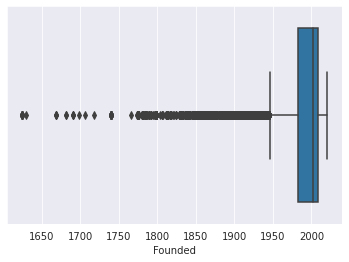

In [136]:
sns.boxplot(x=data['Founded'])

### **Type_of_ownership**

In [137]:
check_col('Type_of_ownership')

column name :  Type_of_ownership
--------------------------------
Per_of_Nulls   :  % 5.72
Num_of_Nulls   :  924
Num_of_Uniques :  14
Duplicates     :  22
College / University               216
Company - Private                 8706
Company - Public                  4083
Contract                            96
Franchise                            7
Government                         321
Hospital                           115
Nonprofit Organization             697
Other Organization                  50
Private Practice / Firm             52
School / School District            34
Self-employed                       12
Subsidiary or Business Segment     694
Unknown                            153
NaN                                924
Name: Type_of_ownership, dtype: int64


In [138]:
data['Type_of_ownership'].replace("Unknown", np.nan, inplace=True)

In [139]:
check_col('Type_of_ownership')

column name :  Type_of_ownership
--------------------------------
Per_of_Nulls   :  % 6.66
Num_of_Nulls   :  1077
Num_of_Uniques :  13
Duplicates     :  22
College / University               216
Company - Private                 8706
Company - Public                  4083
Contract                            96
Franchise                            7
Government                         321
Hospital                           115
Nonprofit Organization             697
Other Organization                  50
Private Practice / Firm             52
School / School District            34
Self-employed                       12
Subsidiary or Business Segment     694
NaN                               1077
Name: Type_of_ownership, dtype: int64


In [140]:
data['Type_of_ownership'] = my_imputer.fit_transform(data['Type_of_ownership'].to_numpy().reshape(-1,1))

> **I handeled the missing data by simple imputer**

In [141]:
stacked_df = data.groupby(['Founded','Type_of_ownership']).agg({'Founded':'count'}).rename(columns = {'Founded': 'Count'}).reset_index()

In [142]:
px.bar(stacked_df, x="Founded", y="Count", color = "Type_of_ownership", title = 'Number of Job Listings vs Year when a Firm was established')

### **Industry**

In [143]:
check_col('Industry')

column name :  Industry
--------------------------------
Per_of_Nulls   :  % 14.18
Num_of_Nulls   :  2291
Num_of_Uniques :  116
Duplicates     :  22
Accounting                               249
Advertising & Marketing                  355
Aerospace & Defense                      329
Airlines                                   3
Architectural & Engineering Services     112
                                        ... 
Vehicle Dealers                           14
Venture Capital & Private Equity          15
Video Games                               94
Wholesale                                 56
NaN                                     2291
Name: Industry, Length: 117, dtype: int64


In [144]:
data['Industry'] = my_imputer.fit_transform(data['Industry'].to_numpy().reshape(-1,1))

> I handeled missing values by simple imputer (most frequent)

### **Size**

In [145]:
check_col('Size')

column name :  Size
--------------------------------
Per_of_Nulls   :  % 5.72
Num_of_Nulls   :  924
Num_of_Uniques :  8
Duplicates     :  22
1 to 50 employees          2180
10000+ employees           3424
1001 to 5000 employees     2557
201 to 500 employees       1645
5001 to 10000 employees     885
501 to 1000 employees      1325
51 to 200 employees        2891
Unknown                     329
NaN                         924
Name: Size, dtype: int64


In [146]:
data = data.dropna(subset=['Size'])

In [147]:
check_col('Size')

column name :  Size
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  8
Duplicates     :  21
1 to 50 employees          2180
10000+ employees           3424
1001 to 5000 employees     2557
201 to 500 employees       1645
5001 to 10000 employees     885
501 to 1000 employees      1325
51 to 200 employees        2891
Unknown                     329
Name: Size, dtype: int64


In [148]:
# Removing parentheses from size
data['Size'] = data['Size'].apply(lambda x : x.split('e')[0])

# Removing K and dollar sign from Salary Estimate
data['Size'] = data['Size'].apply(lambda x : x.replace('employees','').replace('to','-').replace('+',''))
data['Size']

0         501 - 1000 
1        1001 - 5000 
2             1 - 50 
3          201 - 500 
4           51 - 200 
             ...     
16155         1 - 50 
16156       51 - 200 
16157     501 - 1000 
16158         Unknown
16159     501 - 1000 
Name: Size, Length: 15236, dtype: object

### **Revenue**

In [149]:
check_col('Revenue')

column name :  Revenue
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  13
Duplicates     :  21
$1 to $2 billion (USD)               709
$1 to $5 million (USD)               718
$10 to $25 million (USD)             906
$10+ billion (USD)                  1995
$100 to $500 million (USD)          1603
$2 to $5 billion (USD)               910
$25 to $50 million (USD)             770
$5 to $10 billion (USD)              551
$5 to $10 million (USD)              468
$50 to $100 million (USD)           1296
$500 million to $1 billion (USD)     521
Less than $1 million (USD)           512
Unknown / Non-Applicable            4277
Name: Revenue, dtype: int64


In [150]:
data['Revenue'],_= data['Revenue'].str.split('(',1).str # seprate number and text then use number only 

In [151]:
data['Revenue'],_= data['Revenue'].str.split('/',1).str # seprate number and text then use number only 

In [152]:
data['Revenue']= data['Revenue'].replace(to_replace ='million', value = '', regex = True)

In [153]:
data['Revenue']= data['Revenue'].replace(to_replace ='billion', value = '', regex = True)

In [154]:
data['Revenue']

0              Unknown 
1              Unknown 
2              Unknown 
3              Unknown 
4              Unknown 
              ...      
16155        $1 to $5  
16156       $5 to $10  
16157    $100 to $500  
16158          Unknown 
16159      $25 to $50  
Name: Revenue, Length: 15236, dtype: object

In [155]:
def missing_val():
  # you can also count the ratio of missing values
  total_miss = data.isnull().sum()
  # Percentage of missing values
  percent_miss = (total_miss/data.isnull().count()*100)

  # sort attributes by missing value ratio
  missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
  print(missing_data.sort_values(by='Total missing',ascending=False))

missing_val()

                   Total missing  % missing
Headquarters                  44    0.28879
Job_Title                      0    0.00000
Sector                         0    0.00000
avg_salary                     0    0.00000
Max_Salary                     0    0.00000
Min_Salary                     0    0.00000
job_seniority                  0    0.00000
Easy_Apply                     0    0.00000
Revenue                        0    0.00000
Industry                       0    0.00000
Job_Description                0    0.00000
Type_of_ownership              0    0.00000
Founded                        0    0.00000
Size                           0    0.00000
Company_Name                   0    0.00000
Rating                         0    0.00000
City                           0    0.00000


### **Headquarters**

In [156]:
check_col('Headquarters')

column name :  Headquarters
--------------------------------
Per_of_Nulls   :  % 0.29
Num_of_Nulls   :  44
Num_of_Uniques :  1180
Duplicates     :  21
Aachen, Germany              2
Abbott Park, IL             13
Aberdeen, MD                 1
Aberdeen, United Kingdom     4
Abingdon, United Kingdom     6
                            ..
Zaltbommel, Netherlands      1
Zug, Switzerland             2
Zurich, Switzerland         11
ZÜRICH, Switzerland          1
NaN                         44
Name: Headquarters, Length: 1181, dtype: int64


In [157]:
data['Headquarters'] = my_imputer.fit_transform(data['Headquarters'].to_numpy().reshape(-1,1))

> * As we see Headquarters has 44 missing value and I will fill it by simple imputer (most frequent) because it is a categorical feature
> * I will tranform it by labelencoder to detect outliers ,the code bellow 

### **Transform all categorical to numerical** 

In [158]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
LE_col = ['Job_Title','Job_Description', 'Company_Name','Headquarters','Size','Type_of_ownership','Industry','Sector','Revenue','job_seniority','City']
for i in LE_col:
  data.loc[:, i] = LE.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15236 entries, 0 to 16159
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job_Title          15236 non-null  int64  
 1   Job_Description    15236 non-null  int64  
 2   Rating             15236 non-null  float64
 3   Company_Name       15236 non-null  int64  
 4   Headquarters       15236 non-null  int64  
 5   Size               15236 non-null  int64  
 6   Founded            15236 non-null  float64
 7   Type_of_ownership  15236 non-null  int64  
 8   Industry           15236 non-null  int64  
 9   Sector             15236 non-null  int64  
 10  Revenue            15236 non-null  int64  
 11  Easy_Apply         15236 non-null  int64  
 12  job_seniority      15236 non-null  int64  
 13  Min_Salary         15236 non-null  float64
 14  Max_Salary         15236 non-null  float64
 15  avg_salary         15236 non-null  float64
 16  City               152

In [159]:
data

,Job_Title,Job_Description,Rating,Company_Name,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Easy_Apply,job_seniority,Min_Salary,Max_Salary,avg_salary,City
0,5188,331,3.5,2243,692,5,2007.0,1,108,24,11,0,3,111.0,181.0,146.0,432
1,2307,1278,4.5,3315,732,2,2008.0,1,54,7,11,0,0,111.0,181.0,146.0,432
2,2281,2751,3.7,1431,732,0,2008.0,1,58,12,11,1,0,111.0,181.0,146.0,432
3,1463,9777,3.4,4121,614,3,2019.0,1,62,12,11,0,0,111.0,181.0,146.0,356
4,2647,3129,3.4,4981,732,6,2007.0,1,1,5,11,0,0,111.0,181.0,146.0,432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,1194,10748,4.5,3488,461,0,2008.0,1,21,12,1,0,0,76.0,128.0,102.0,690
16156,2729,7145,2.9,237,940,6,1993.0,1,99,5,7,0,0,76.0,128.0,102.0,226
16157,4870,8839,3.7,1059,226,5,2008.0,1,58,12,4,0,3,76.0,128.0,102.0,299
16158,4867,12337,3.5,4138,289,7,2008.0,2,58,12,11,0,3,76.0,128.0,102.0,690


In [160]:
data.keys()

Index(['Job_Title', 'Job_Description', 'Rating', 'Company_Name',
       'Headquarters', 'Size', 'Founded', 'Type_of_ownership', 'Industry',
       'Sector', 'Revenue', 'Easy_Apply', 'job_seniority', 'Min_Salary',
       'Max_Salary', 'avg_salary', 'City'],
      dtype='object')

In [161]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[0.83975397 0.02642715 0.625      ... 0.60784314 0.61835749 0.60674157]
 [0.37342182 0.10203593 0.875      ... 0.60784314 0.61835749 0.60674157]
 [0.36921334 0.21964072 0.675      ... 0.60784314 0.61835749 0.60674157]
 ...
 [0.788281   0.70570858 0.675      ... 0.4        0.4057971  0.41994382]
 [0.7877954  0.98499002 0.625      ... 0.4        0.4057971  0.96910112]
 [0.19326643 0.15744511 0.65       ... 0.4        0.4057971  0.96910112]]


### **Outliers detect for all columns**

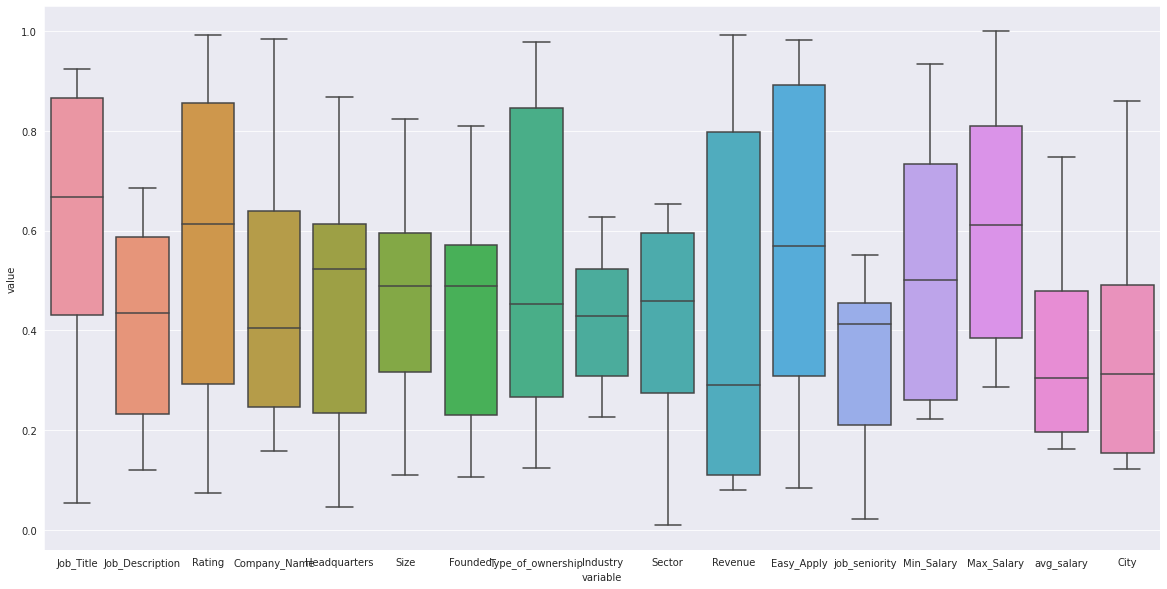

In [162]:
from IPython.core.pylabtools import figsize
figsize(20,10)
df = pd.DataFrame(data = np.random.random(size=(6,17)), columns = ['Job_Title', 'Job_Description', 'Rating', 'Company_Name',
       'Headquarters', 'Size', 'Founded', 'Type_of_ownership', 'Industry',
       'Sector', 'Revenue', 'Easy_Apply', 'job_seniority', 'Min_Salary',
       'Max_Salary', 'avg_salary', 'City'])

sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

### <a>Hypothies test 2

**Two sampled T-test**


Is there a relationship between the rating and the founded

In [163]:
Founded=np.array(data['Founded'])

In [164]:
Rating=np.array(data['Rating'])

In [165]:
df_task_highest_salary_top_comp = """SELECT Founded,MAX(Rating) 
             FROM data 
             GROUP BY Founded
             ORDER BY Rating DESC, Rating DESC
             LIMIT 20"""
ps.sqldf(df_task_highest_salary_top_comp) 

,Founded,MAX(Rating)
0,1964.0,5.0
1,1981.0,5.0
2,1982.0,5.0
3,1987.0,5.0
4,1989.0,5.0
5,1991.0,5.0
6,1992.0,5.0
7,1993.0,5.0
8,1996.0,5.0
9,1997.0,5.0


In [166]:
rating_mean = np.mean(Rating)
Founded_mean = np.mean(Founded)
print("rating mean value:",rating_mean)
print("founded mean value:",Founded_mean)

rating mean value: 3.7668548175374115
founded mean value: 1983.0924783407718


In [167]:
rating_std = np.std(Rating)
Founded_std = np.std(Founded)
print("rating std value:",rating_std)
print("founded std value:",Founded_std)

rating std value: 0.6515366291963858
founded std value: 45.876645746701605


In [168]:
from scipy.stats import ttest_ind
ttest,pval =ttest_ind(Rating,Founded)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 0.0
we reject null hypothesis


* Null Hypothesis : there are relationship between rating and founded ,I mean that the companies that founded in the past have high rating than the companies that founded now 

* Alternate Hypothesis:no relation between them 

### **Hypothies test 3**

<a>Is there a relationship between the easy apply and the founded

In [169]:
easy_apply=np.array(data['Easy_Apply'].nlargest(n=30))
easy_apply

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [170]:
Founded=np.array(data['Founded'].nsmallest(n=30))
Founded

array([1625., 1625., 1625., 1625., 1625., 1625., 1625., 1625., 1625.,
       1625., 1625., 1630., 1668., 1668., 1668., 1682., 1682., 1690.,
       1690., 1690., 1698., 1706., 1718., 1740., 1740., 1740., 1740.,
       1740., 1740., 1740.])

In [171]:
df_new = data[['Founded', 'Easy_Apply']]
df_new

,Founded,Easy_Apply
0,2007.0,0
1,2008.0,0
2,2008.0,1
3,2019.0,0
4,2007.0,0
...,...,...
16155,2008.0,0
16156,1993.0,0
16157,2008.0,0
16158,2008.0,0


In [172]:
df_easy_apply = df_new[df_new['Easy_Apply'] == 1]
df_easy_apply.reset_index()
df_easy_apply.head(10)

,Founded,Easy_Apply
2,2008.0,1
7,2008.0,1
8,2018.0,1
10,2014.0,1
15,1998.0,1
31,2012.0,1
34,1914.0,1
42,2011.0,1
49,2011.0,1
66,1988.0,1


In [173]:
apply_mean = np.mean(easy_apply)
Founded_mean = np.mean(Founded)
print("apply mean value:",apply_mean)
print("founded mean value:",Founded_mean)

apply mean value: 1.0
founded mean value: 1674.8333333333333


In [174]:
apply_std = np.std(easy_apply)
Founded_std = np.std(Founded)
print("rating std value:",apply_std)
print("founded std value:",Founded_std)

rating std value: 0.0
founded std value: 45.955836287558604


In [175]:
from scipy.stats import ttest_ind
ttest,pval =ttest_ind(Founded,easy_apply)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 1.4791689412103688e-83
we reject null hypothesis


> This is mean no relation between easy apply and founded 